In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
a = np.load('vae/15490305717520206////////////////////////validation/reconstruction_epoch_2_env_0.npy')

#a = np.load('/home/looka/workspace/phd/shallow_mind_lab/WorldModels/archives_before_NIPS/flatland_topview_wordmodels/vae/15480854362153199/////////validation/reconstruction_epoch_360.npy')

In [39]:
a[0][i].shape

(64, 64, 3)

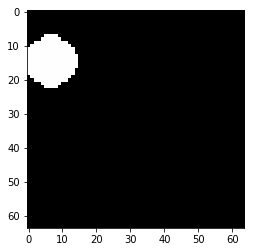

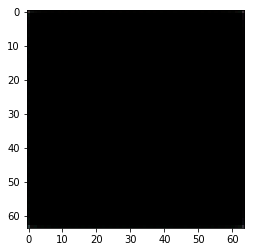

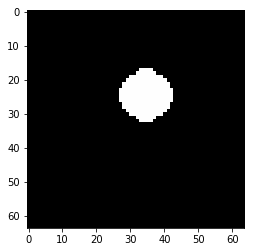

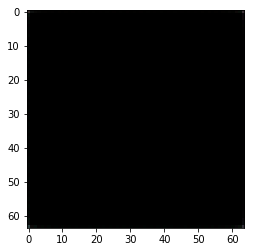

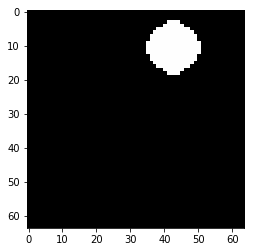

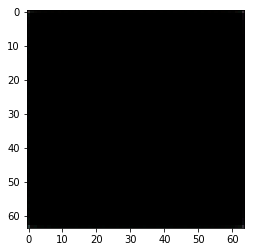

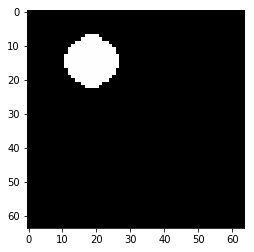

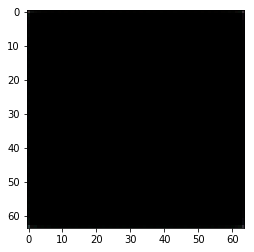

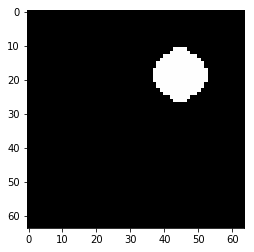

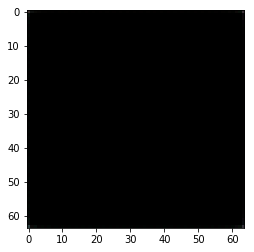

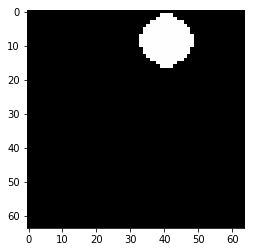

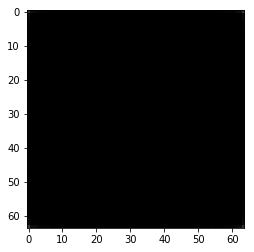

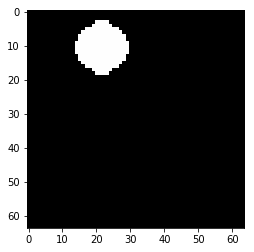

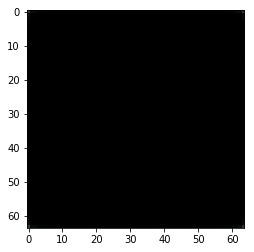

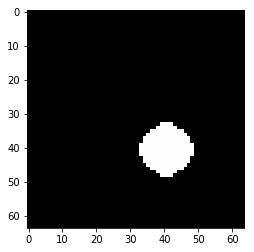

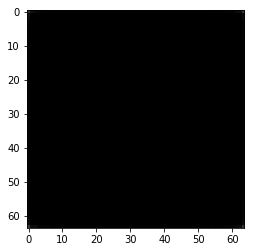

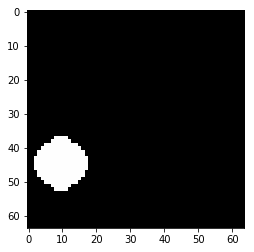

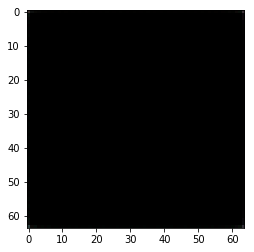

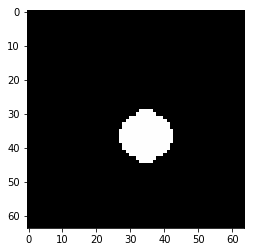

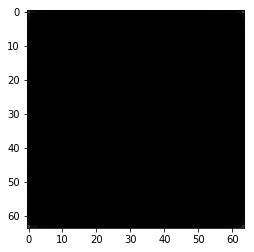

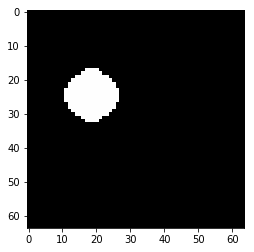

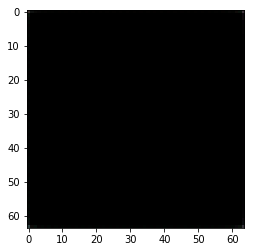

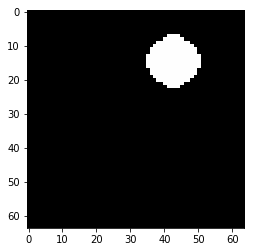

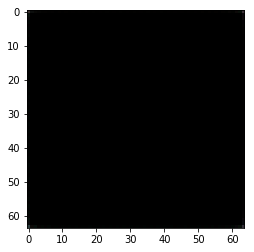

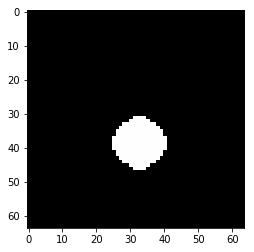

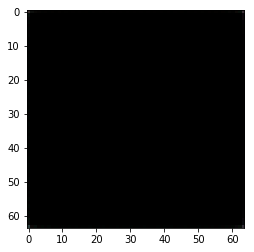

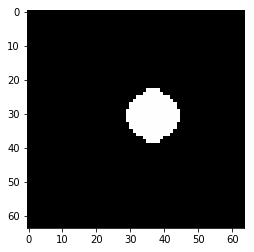

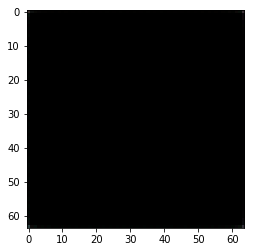

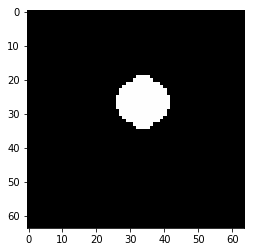

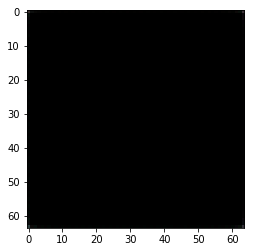

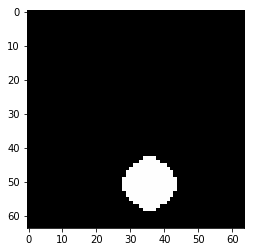

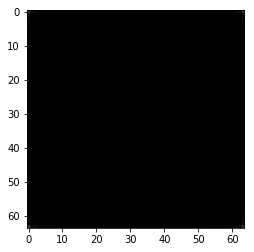

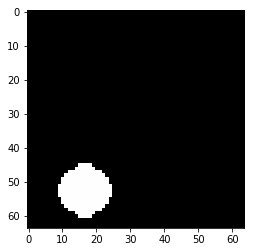

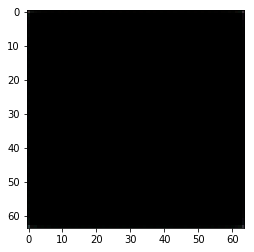

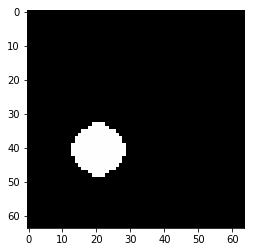

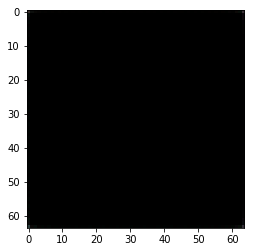

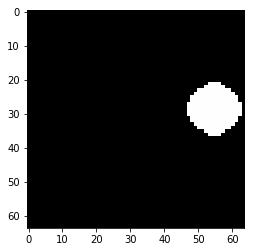

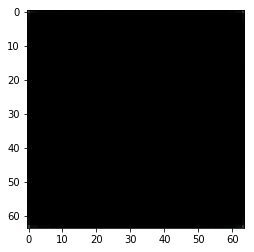

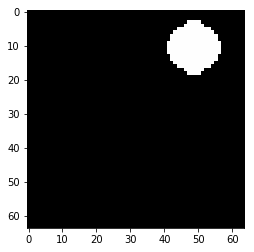

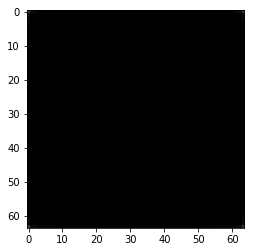

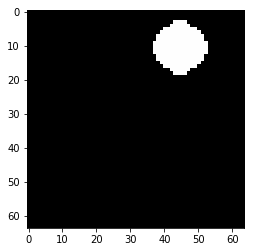

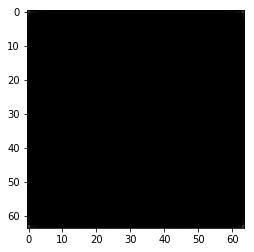

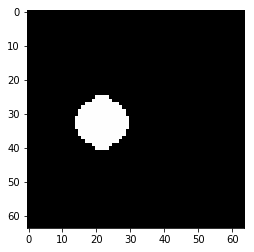

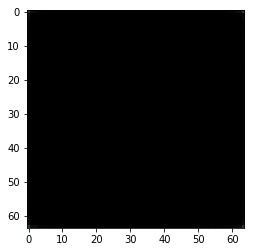

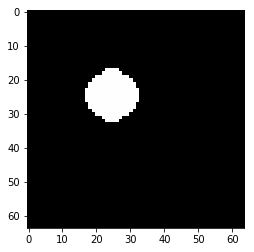

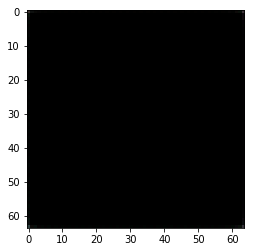

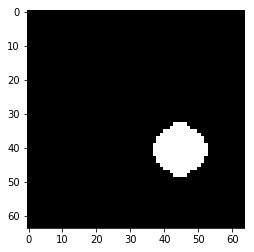

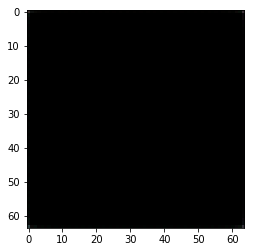

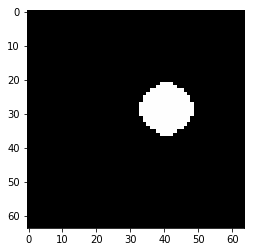

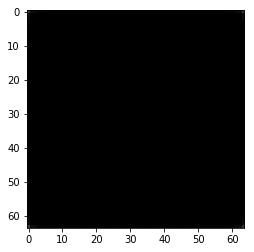

KeyboardInterrupt: 

In [40]:
for i in range(100):
    plt.imshow(a[0][i])
    plt.show()
    plt.imshow(a[1][i])
    plt.show()

In [36]:
import torch
from vae.arch_torch import VAE
vae = torch.load('vae/15490305717520206///////saved_models/epoch_2_env_0', map_location={'cuda:0': 'cpu'})

In [14]:
a[0][i].shape

(64, 64, 3)

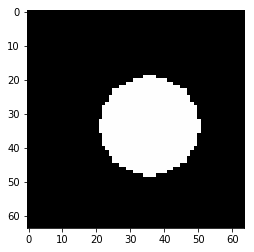

tensor([[-2.5238831043, -0.4431197047]])


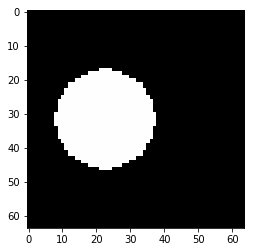

tensor([[0.7238652110, -0.3134103715]])


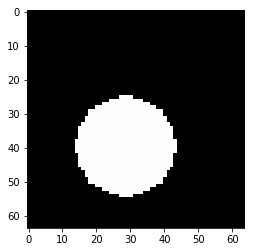

tensor([[-1.9919278622, 0.4557837844]])


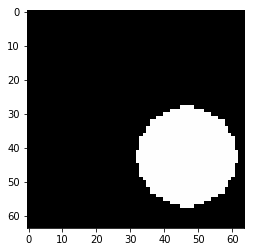

tensor([[0.3823746443, 0.7307146192]])


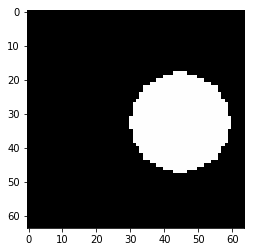

tensor([[1.3598868847, 1.1220024824]])


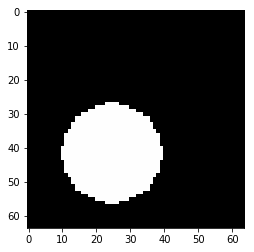

tensor([[0.3215618134, -0.9325176477]])


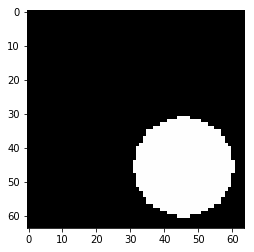

tensor([[0.9537865520, -1.7842953205]])


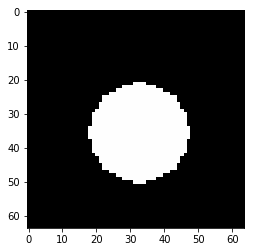

tensor([[1.4056881666, -0.8601453304]])


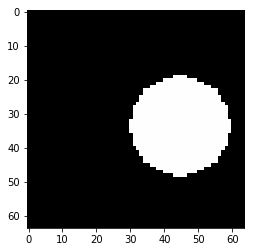

tensor([[-0.0480364673, -0.3822515309]])


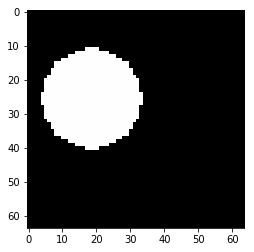

tensor([[-0.6126488447, -0.3196363747]])


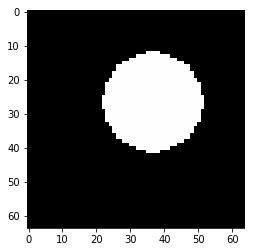

tensor([[0.6529938579, 2.0149710178]])


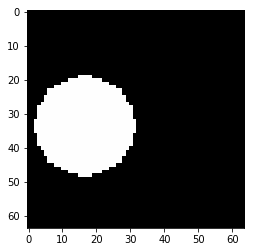

tensor([[-0.5067621469, 0.7614325285]])


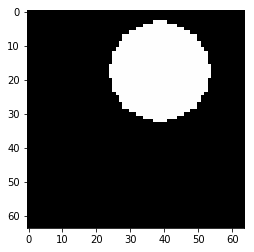

tensor([[0.7422466874, 1.9957379103]])


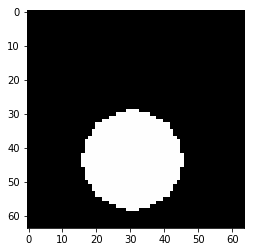

tensor([[0.7347664237, 1.9039074183]])


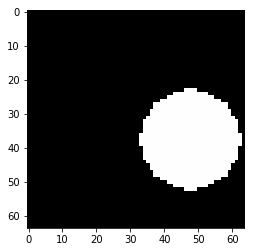

tensor([[0.1199658141, 0.7531098127]])


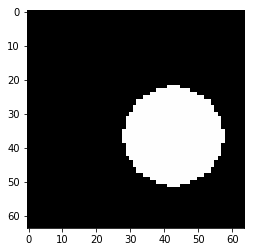

tensor([[-0.8798823953, -1.4829151630]])


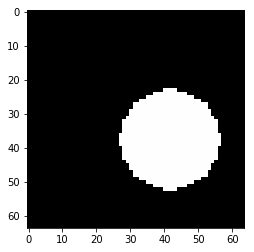

tensor([[0.2978697121, -0.3998070359]])


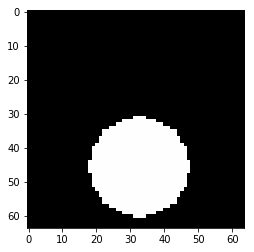

tensor([[-1.1088563204, 0.6978487372]])


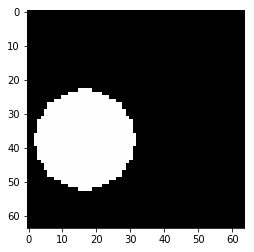

tensor([[0.4780561030, -0.7335722446]])


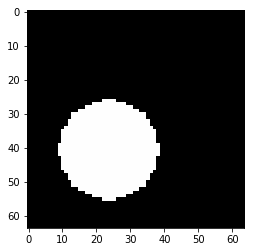

tensor([[-0.1082881987, 0.3575608730]])


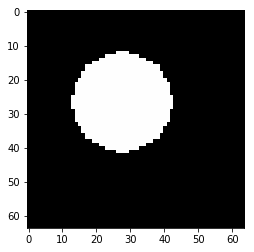

tensor([[-1.1764876842, -0.1623072475]])


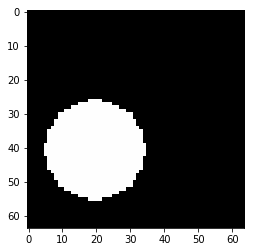

tensor([[-0.1302336305, -1.1181724072]])


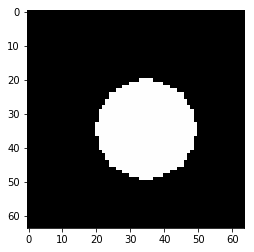

tensor(1.00000e-02 *
       [[-3.3235296607, 8.1013448536]])


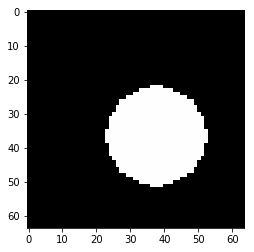

tensor([[2.0108671188, -0.5643211603]])


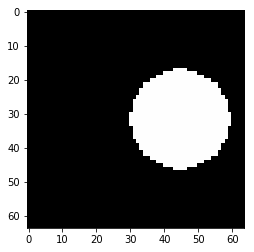

tensor([[-0.8406937718, -0.4065606594]])


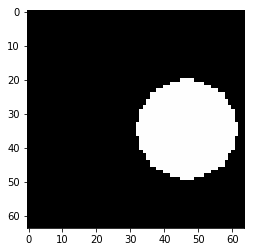

tensor([[0.5368671417, 0.3339789212]])


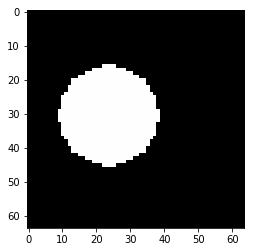

tensor([[0.4134680331, -0.5310087800]])


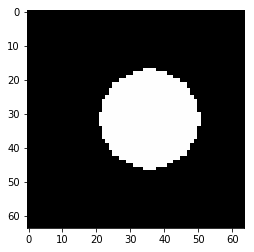

tensor([[-0.7776134014, -0.7840980887]])


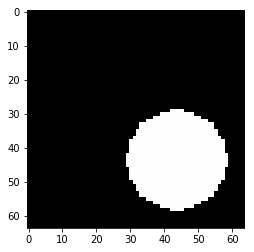

tensor([[-1.5505359173, -1.3193339109]])


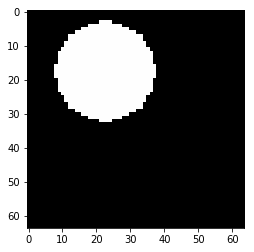

tensor([[-1.4349368811, -0.3534916043]])


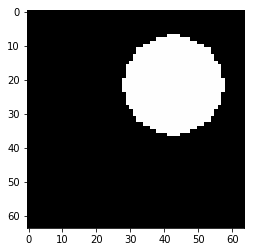

tensor([[0.3921142220, -1.5275510550]])


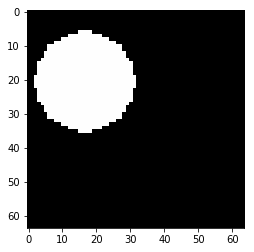

tensor([[1.2218034267, -1.3792126179]])


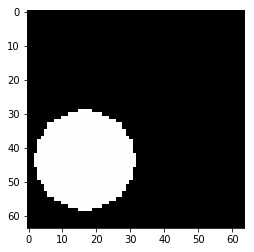

tensor([[-0.7760937214, 0.6466167569]])


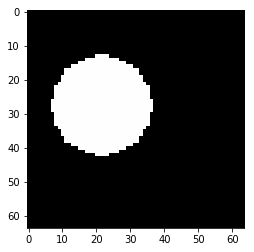

tensor([[0.7237830758, -0.0164777655]])


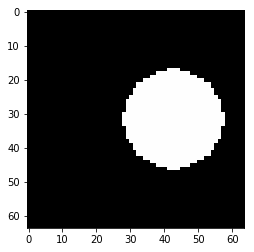

tensor([[-1.7023757696, 0.7519934177]])


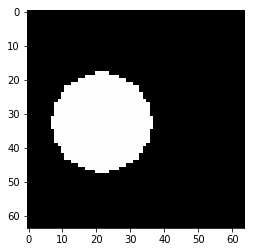

tensor([[0.3656332195, 0.5470668077]])


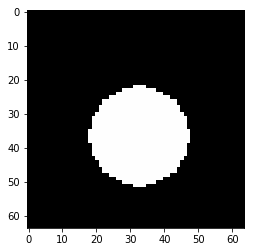

tensor([[-0.4672571421, 0.5348777771]])


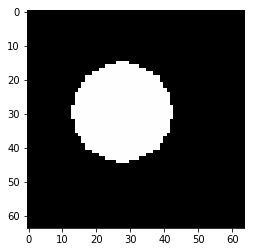

tensor([[-1.8142491579, -0.5315703154]])


KeyboardInterrupt: 

In [37]:
for i in range(40):
    im = vae.forward(torch.Tensor(a[0][i].reshape(1,64,64,3).transpose((0,3,1,2))), encode=True)
    plt.imshow(a[0][i])
    plt.show()
    print(im)

In [19]:
im

tensor([[-1.3622273207, 0.4291262627]])

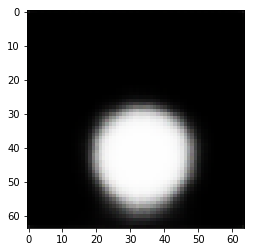

In [38]:
z = torch.tensor([0,1]).float().view(1,2)

for i in range(1):
    im = vae.forward(z, decode=True).detach().numpy().reshape(3,64,64).transpose((1,2,0))
    plt.imshow(im)
    #plt.savefig('vae/15483481760431166/disentanglement/z1_'+str(i)+'.png')
    plt.show()
    z=z+torch.tensor([0.,0.1]).float()
    


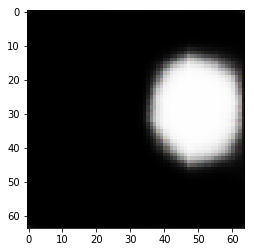

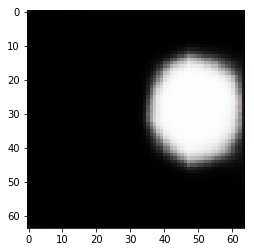

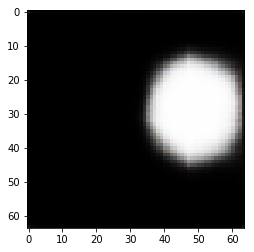

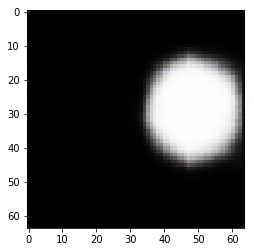

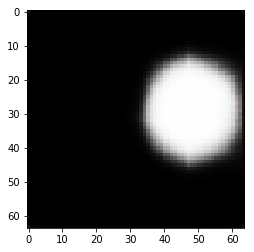

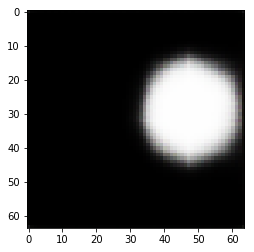

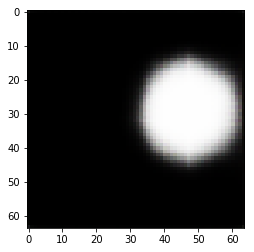

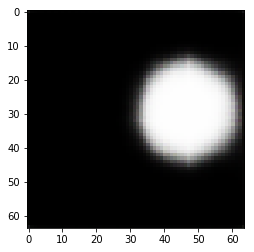

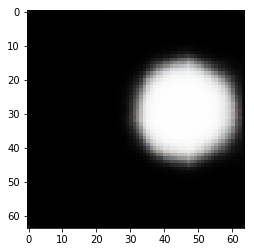

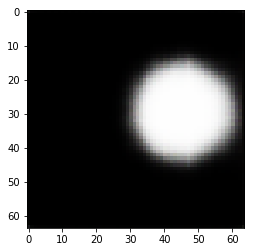

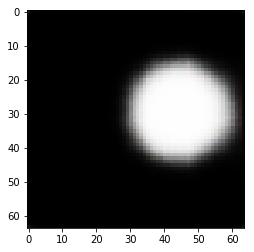

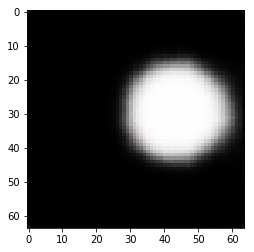

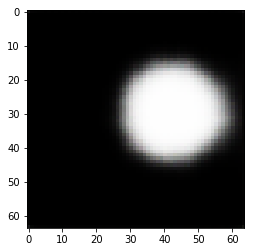

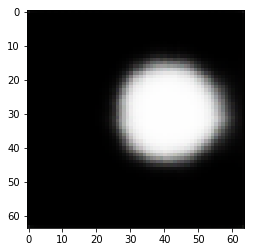

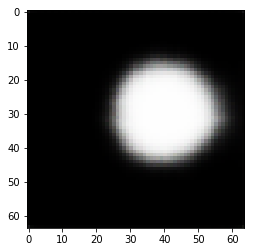

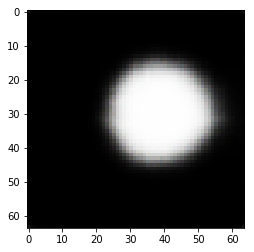

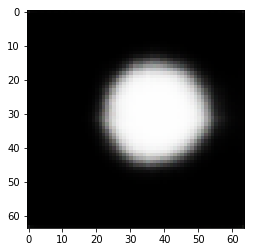

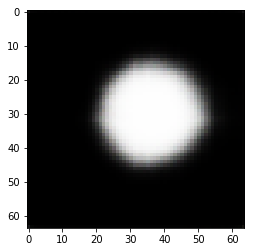

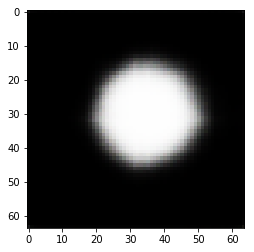

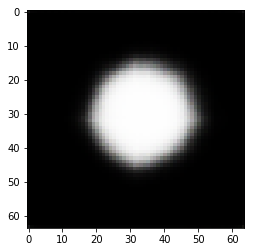

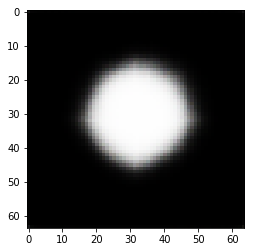

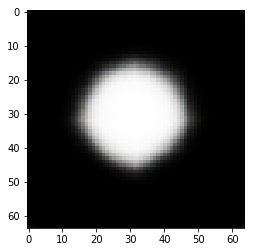

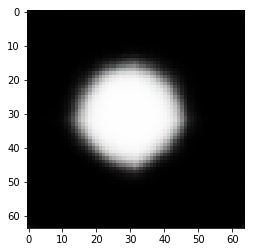

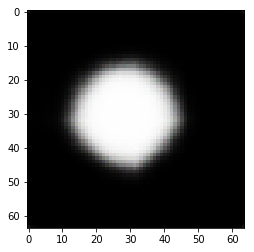

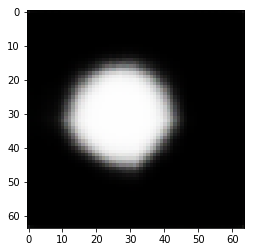

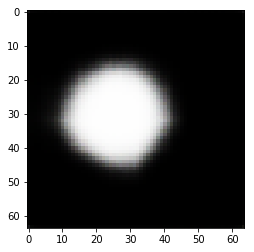

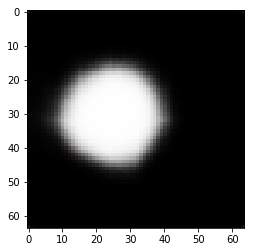

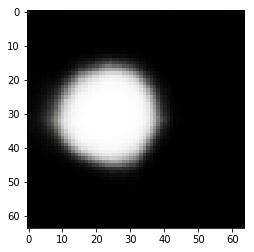

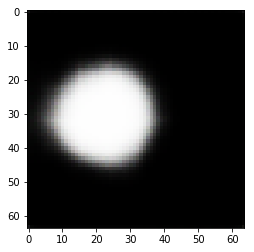

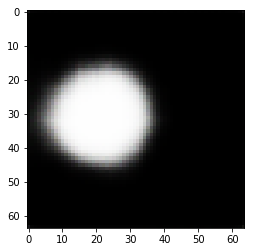

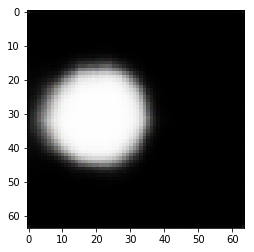

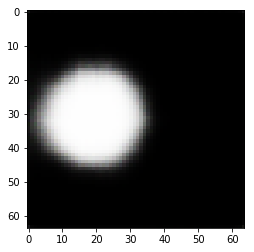

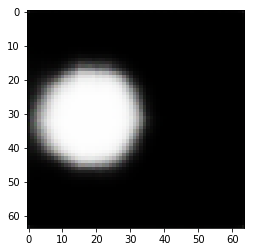

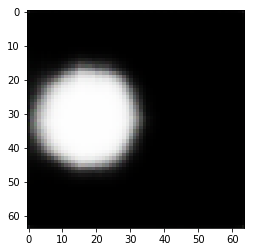

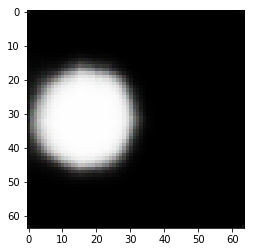

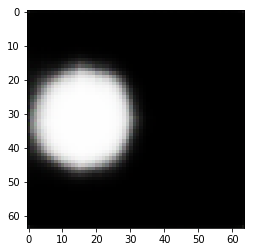

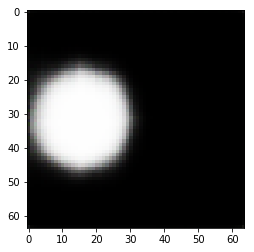

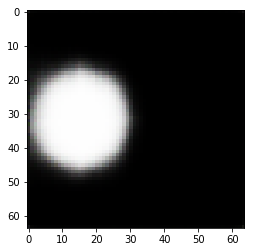

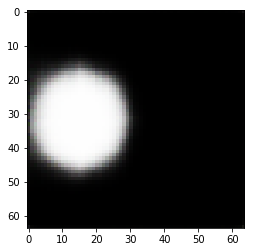

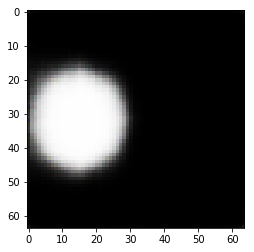

In [56]:
z = torch.tensor([-2,0]).float().view(1,2)

for i in range(40):
    im = vae.forward(z, decode=True).detach().numpy().reshape(3,64,64).transpose((1,2,0))
    plt.imshow(im)
    plt.savefig('vae/15483481760431166/disentanglement/z2_'+str(i)+'.png')
    plt.show()
    z=z+torch.tensor([0.1,0.]).float()
    

In [16]:
path_input = 'images/'
import os
lol=[]
from PIL import Image
for i,elem in enumerate(os.listdir(path_input)[:10]):
	lol.append(np.asarray(Image.open(path_input + elem).convert('RGB')))
lol = np.array(lol).reshape(-1,64,64,3)/255.


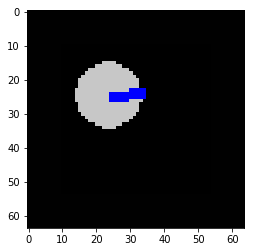

In [17]:
plt.imshow(lol[0])

In [18]:
im = vae.forward(torch.tensor(lol[0]).float(), encode=True).detach().numpy()

RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[2, 2]

In [35]:
from PIL import Image
import os
import numpy as np
import torch
%pylab inline
inputs = []
for i,elem in enumerate(os.listdir('images/')):
    im = np.asarray(Image.open('images/' + str(i+1)+'.png').convert('RGB'))
    inputs.append(im)
inputs = np.array(inputs).reshape(-1,64,64,3)
inputs = inputs.astype('float32') / 255.




from vae.arch_torch import VAE
vae = torch.load('vae/15483481760431166_disentangled/saved_models/epoch_10_env_0', map_location={'cuda:0': 'cpu'})

inputs_z = []
for i,elem in enumerate(inputs):
    #plt.imshow(elem)
    #plt.show()
    z = vae.forward(torch.Tensor(elem.reshape(-1,64,64,3).transpose((0,3,1,2))), encode=True, mean=True)
    inputs_z.append(z)
    print(z)


Populating the interactive namespace from numpy and matplotlib
tensor([[-0.2205325514, 0.1365664750]])
tensor([[-0.2146198452, 0.4964202642]])
tensor([[0.0418218821, 1.0807925463]])
tensor([[0.2232318223, 0.9549823999]])
tensor([[0.5780987740, 0.9673200250]])
tensor([[0.4512971640, -0.8536060452]])
tensor([[0.5780987740, 0.9673200250]])
tensor([[0.4512971640, -0.8536060452]])
tensor([[0.3939396739, -0.4466330409]])
tensor([[0.4512971640, -0.8536060452]])
tensor([[0.5780987740, 0.9673200250]])
tensor([[0.5474973917, 0.4279783964]])
tensor([[0.5780987740, 0.9673200250]])
tensor([[0.9791607857, 0.8548281193]])
tensor([[1.0074667931, 0.4544495642]])
tensor([[1.0604029894, 0.0781230927]])
tensor([[0.3890576363, 0.1058949679]])
tensor([[0.4104621410, -0.2806093395]])
tensor([[1.0082650185, -0.3289370239]])
tensor([[1.0604029894, 0.0781230927]])
tensor([[1.0082650185, -0.3289370239]])
tensor([[0.4104621410, -0.2806093395]])
tensor([[0.3890576363, 0.1058949679]])
tensor(1.00000e-02 *
       [[

tensor([[-0.0008880912, -0.5049622059]])
tensor([[-0.3822557330, -0.5793657303]])
tensor([[-0.1947357059, -0.0422919318]])
tensor(1.00000e-02 *
       [[4.7082956880, 7.7498048544]])
tensor([[0.3709966540, -0.0520308279]])
tensor(1.00000e-02 *
       [[4.7082956880, 7.7498048544]])
tensor([[-0.0008880912, -0.5049622059]])
tensor([[0.0355345793, -1.1761063337]])
tensor([[-0.0008880912, -0.5049622059]])
tensor([[-0.3822557330, -0.5793657303]])
tensor([[-0.2670633495, -1.1647496223]])
tensor([[-0.8513771892, -1.0395916700]])
tensor([[-0.8542179465, -0.4876350760]])
tensor([[1.0123257637, -0.7089397907]])
tensor([[-0.8542179465, -0.4876350760]])
tensor([[-0.3822557330, -0.5793657303]])
tensor([[-0.8542179465, -0.4876350760]])
tensor([[-0.3822557330, -0.5793657303]])
tensor([[-0.8542179465, -0.4876350760]])
tensor([[1.0123257637, -0.7089397907]])
tensor([[1.0568317175, -0.2563315928]])
tensor([[1.0426828861, 0.1102015823]])
tensor([[-0.8785933852, 0.2209420800]])
tensor([[1.0426828861, 0.11

tensor([[-0.6042293906, -0.8796417713]])
tensor([[-0.0062063970, -0.9427786469]])
tensor([[0.1667648852, -1.1036050320]])
tensor([[0.1545911729, -0.4115848839]])
tensor([[0.1667648852, -1.1036050320]])
tensor([[0.1545911729, -0.4115848839]])
tensor([[0.0600001216, -0.4115808308]])
tensor([[-0.0062063970, -0.9427786469]])
tensor([[-0.6042293906, -0.8796417713]])
tensor([[-1.1140251160, -0.8287420869]])
tensor([[0.7310371399, -0.9847580194]])
tensor([[0.8646538258, 0.8039159775]])
tensor([[0.8462533355, 0.4265676141]])
tensor([[0.3289188445, 0.3468425572]])
tensor([[0.0556544885, 0.2953402698]])
tensor([[-0.4672227502, 0.5061824918]])
tensor([[-0.2531064749, 1.0234959126]])
tensor([[-0.7035168409, 1.0107804537]])
tensor([[-0.9924002290, -0.8610720634]])
tensor([[-1.0050048828, -0.4467298388]])
tensor([[-1.0378559828, 0.1141676530]])
tensor([[-1.0472013950, 0.4718762934]])
tensor([[-0.4875975847, 0.4081991911]])
tensor([[-0.2804978490, 0.9155656099]])
tensor([[-0.4767837226, -1.1233006716

tensor([[-0.9244536757, 0.6252697706]])
tensor([[-0.6211606264, 0.9920729399]])
tensor([[0.6726189852, -1.2352340221]])
tensor([[0.6575419903, -0.5747251511]])
tensor([[0.7164019346, 0.0078482013]])
tensor(1.00000e-02 *
       [[5.7978276163, 5.9196766466]])
tensor([[0.7164019346, 0.0078482013]])
tensor([[0.7751690745, 0.2763174772]])
tensor([[0.9824091196, 0.1252163202]])
tensor([[0.8742355704, -0.0364005640]])
tensor([[0.8681513667, -0.5604376793]])
tensor([[-0.6586002111, -0.4685114622]])
tensor([[-0.7415598035, -1.0891085863]])
tensor([[-0.6586002111, -0.4685114622]])
tensor([[-0.6228973866, 0.0805337876]])
tensor([[-0.6586002111, -0.4685114622]])
tensor([[-0.7415598035, -1.0891085863]])
tensor([[-1.1134819984, -0.8892071843]])
tensor([[-1.1693794727, -0.4063335657]])
tensor([[-1.1103222370, 0.0610533655]])
tensor([[-1.1693794727, -0.4063335657]])
tensor([[-0.6586002111, -0.4685114622]])
tensor([[-0.0951225832, -0.4228700399]])
tensor(1.00000e-02 *
       [[1.2419953011, 9.14832279

tensor([[0.9530133605, 0.7406069040]])
tensor([[-0.8011254072, 0.9042540193]])
tensor([[-0.3336718082, 0.8702224493]])
tensor([[-0.5346855521, -1.1176035404]])
tensor([[-0.5189736485, -0.4932799339]])
tensor([[-0.5346855521, -1.1176035404]])
tensor([[0.0325222798, -1.1676778793]])
tensor([[0.0539893806, -0.4064991772]])
tensor([[-0.5189736485, -0.4932799339]])
tensor([[-0.5346855521, -1.1176035404]])
tensor([[0.0325222798, -1.1676778793]])
tensor([[0.0539893806, -0.4064991772]])
tensor([[0.2017399222, -0.5379741192]])
tensor([[0.1165855229, 0.0713810399]])
tensor([[0.1530038565, 0.1686281562]])
tensor([[0.8374022841, 0.2451662719]])
tensor([[0.7998635769, 0.5798435807]])
tensor([[0.6348410249, 0.8573636413]])
tensor([[0.7242623568, -0.6133534312]])
tensor([[0.1898618490, -0.5612481833]])
tensor([[0.7242623568, -0.6133534312]])
tensor([[0.7411105633, -0.2402680367]])
tensor([[0.1362308413, 0.0291462019]])
tensor(1.00000e-02 *
       [[7.8604422510, 9.4733484089]])
tensor([[-0.4608792663

tensor([[0.1959408671, 0.9286310673]])
tensor([[0.4774470031, 0.9119493961]])
tensor([[0.3910206556, 0.3433410525]])
tensor([[0.9306593537, 0.4191344976]])
tensor([[0.9133705497, 0.0345821865]])
tensor([[-1.0977247953, 0.1444578618]])
tensor([[-1.0124330521, 0.5288905501]])
tensor([[-0.7606164813, 1.0034906864]])
tensor([[0.8875252008, 0.7992959619]])
tensor([[-0.8271110058, 1.0547616482]])
tensor([[0.8646538258, 0.8039159775]])
tensor([[0.8462533355, 0.4265676141]])
tensor([[0.8437501788, 0.0694952905]])
tensor([[0.8630691767, -0.4571041763]])
tensor([[0.8437501788, 0.0694952905]])
tensor([[0.1241905168, 0.1105780602]])
tensor([[0.8437501788, 0.0694952905]])
tensor([[0.1241905168, 0.1105780602]])
tensor([[0.0506520532, 0.1061349809]])
tensor([[0.0725343153, -0.1960850656]])
tensor([[0.0506520532, 0.1061349809]])
tensor([[0.0725343153, -0.1960850656]])
tensor([[0.0415329859, -0.7082226872]])
tensor([[0.2642765641, -0.8035956025]])
tensor([[0.0415329859, -0.7082226872]])
tensor([[0.0725

tensor([[-0.9033525586, 0.5084289908]])
tensor([[-1.0594191551, 0.1821244508]])
tensor([[-1.1544593573, -0.0587280318]])
tensor([[0.6495309472, -0.3255475461]])
tensor([[1.0398532152, -0.2951070368]])
tensor([[1.0025553703, -0.7762385011]])
tensor([[0.5823071003, -0.6434717178]])
tensor([[0.4499723613, -1.1949919462]])
tensor([[0.5823071003, -0.6434717178]])
tensor([[1.0025553703, -0.7762385011]])
tensor([[-0.7439656854, -0.5362862945]])
tensor([[-0.8527791500, -0.2055456042]])
tensor([[-0.1243280917, -0.1193026528]])
tensor(1.00000e-02 *
       [[5.5810194463, 0.2337504877]])
tensor([[-0.1243280917, -0.1193026528]])
tensor(1.00000e-02 *
       [[5.5810194463, 0.2337504877]])
tensor([[0.0798501149, -0.5797335505]])
tensor(1.00000e-02 *
       [[5.5810194463, 0.2337504877]])
tensor([[-0.1243280917, -0.1193026528]])
tensor(1.00000e-02 *
       [[5.5810194463, 0.2337504877]])
tensor(1.00000e-02 *
       [[-3.7844341248, 6.7533068359]])
tensor([[0.4729232192, 0.1159647107]])
tensor([[0.501

tensor([[0.0355345793, -1.1761063337]])
tensor([[-0.0008880912, -0.5049622059]])
tensor(1.00000e-02 *
       [[4.7082956880, 7.7498048544]])
tensor([[-0.1947357059, -0.0422919318]])
tensor([[-0.3234243989, 0.1464748234]])
tensor([[-0.3345958292, 0.6131631732]])
tensor([[-0.0184336808, 1.1189303398]])
tensor([[-0.4177509546, -0.6578336358]])
tensor([[-0.2978973985, -0.1640335023]])
tensor(1.00000e-02 *
       [[4.4559556991, 0.3803211497]])
tensor([[-0.2978973985, -0.1640335023]])
tensor([[-0.9442692995, -0.1652814448]])
tensor([[-0.7911002040, -0.5294258595]])
tensor([[-0.4177509546, -0.6578336358]])
tensor([[-0.2978973985, -0.1640335023]])
tensor([[-0.4177509546, -0.6578336358]])
tensor([[-0.1886316091, -1.1538037062]])
tensor([[-0.3345958292, 0.6131631732]])
tensor([[-0.3234243989, 0.1464748234]])
tensor([[-0.8785933852, 0.2209420800]])
tensor([[-0.3234243989, 0.1464748234]])
tensor([[-0.3345958292, 0.6131631732]])
tensor([[0.1317686588, 0.5134662390]])
tensor(1.00000e-02 *
       [[

KeyboardInterrupt: 

# Disantanglement a la WM

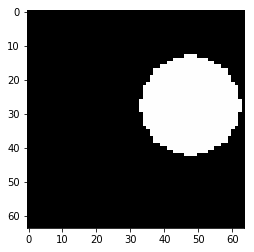

In [92]:
plt.imshow(inputs[5])

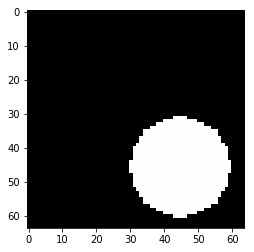

In [88]:
plt.imshow(a[0][73])


In [93]:
lol = [inputs[1],a[0][57]]
lol = [inputs[2],a[0][73]]
lol = [inputs[5],a[0][73]]

for i,elem in enumerate(lol):
    z = vae.forward(torch.Tensor(elem.reshape(-1,64,64,3).transpose((0,3,1,2))), encode=True, mean=True)
    print(z)

tensor([[-1.4634227753, -0.1672070026]])
tensor([[-1.0177534819, 1.5018343925]])


In [94]:
for i,elem in enumerate(inputs):
    z = vae.forward(torch.Tensor(elem.reshape(-1,64,64,3).transpose((0,3,1,2))), encode=True, mean=True)
    print(z)

tensor([[1.2881609201, 0.7999688983]])
tensor([[1.3269292116, 1.3468818665]])
tensor([[-0.8163252473, 1.4836703539]])
tensor([[0.6588867307, -0.8737688065]])
tensor([[0.7960991859, 1.2812536955]])
tensor([[-1.4634227753, -0.1672070026]])
tensor([[-0.1344634891, -0.6558826566]])
tensor([[-1.0001604557, -1.1174941063]])
tensor([[-1.3785644770, 1.6034935713]])
tensor([[0.1689019948, -1.3972893953]])
tensor([[-0.2987642288, -0.7910372019]])
tensor([[0.1689019948, -1.3972893953]])
tensor([[0.3667835295, 1.3254843950]])
tensor([[0.3107977211, 1.1230502129]])
tensor([[0.6237382889, -0.4576852918]])
tensor([[-1.0206793547, -0.1408300549]])
tensor([[0.1467346251, -0.4081869125]])
tensor([[0.3107977211, 1.1230502129]])
tensor([[-0.0306514855, 0.9738384485]])
tensor([[-0.0289229508, 0.4839879274]])
tensor([[-0.0289229508, 0.4839879274]])
tensor([[0.6077221036, -1.3032037020]])
tensor([[1.0711526871, -1.4926420450]])
tensor([[-1.3591730595, -0.4918024540]])
tensor([[0.2814901471, -0.6717943549]])


In [1]:
import torch
import numpy as np
%pylab inline

from forward.arch import FF
ff = torch.load('forward/15490360489701366//////saved_models/epoch_66_env_0', map_location={'cuda:0': 'cpu'})

from vae.arch_torch import VAE
vae = torch.load('vae/15483481760431166_disentangled/saved_models/epoch_10_env_0', map_location={'cuda:0': 'cpu'})

Populating the interactive namespace from numpy and matplotlib


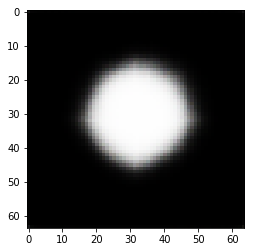

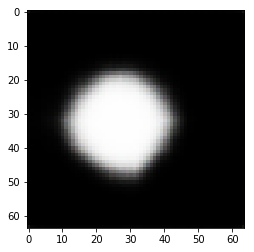

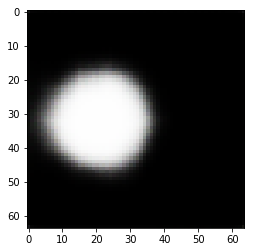

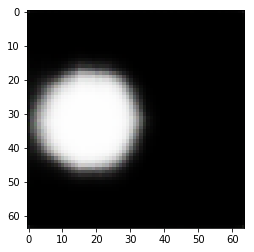

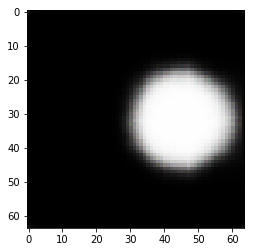

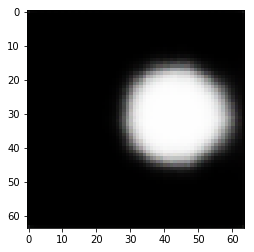

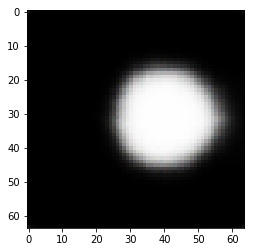

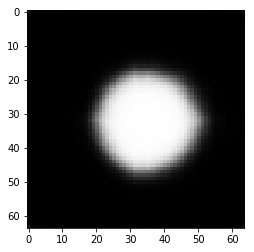

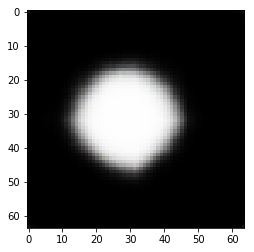

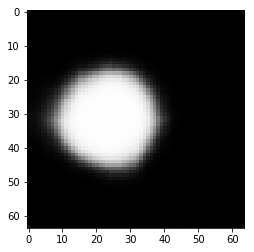

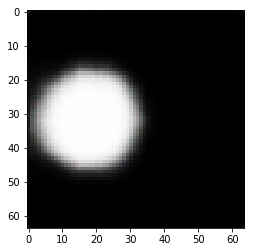

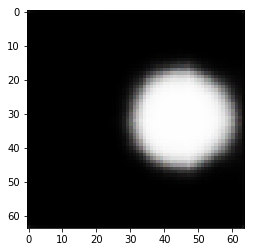

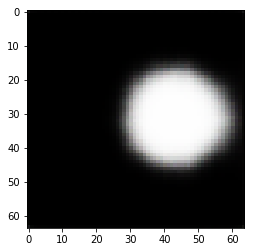

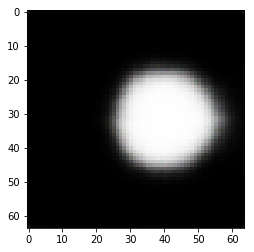

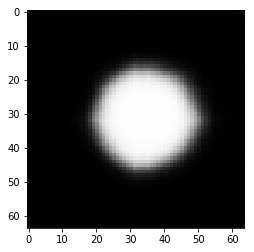

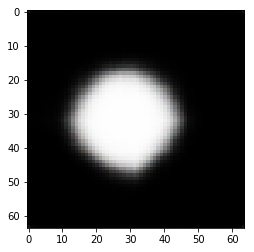

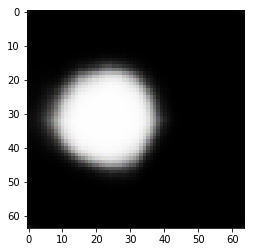

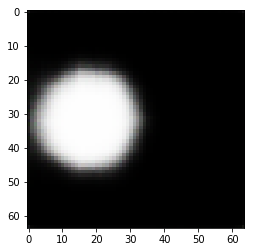

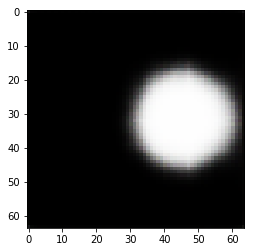

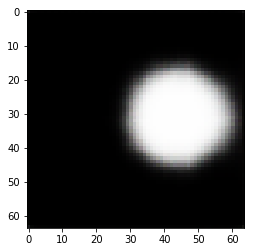

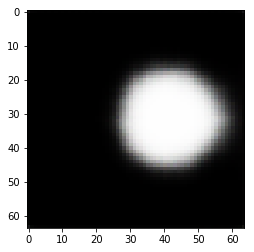

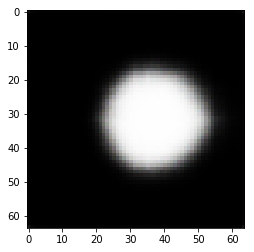

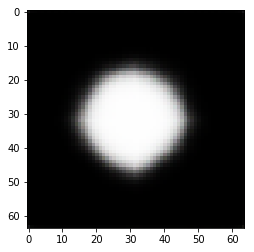

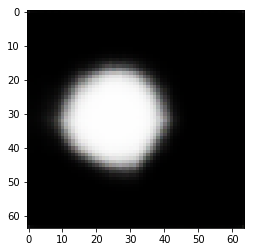

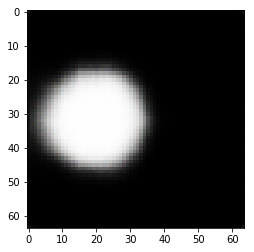

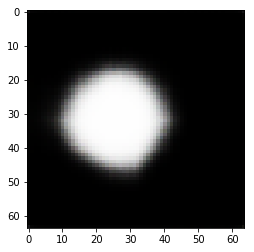

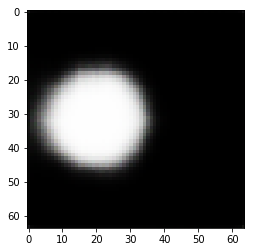

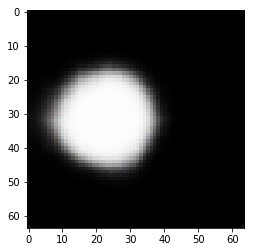

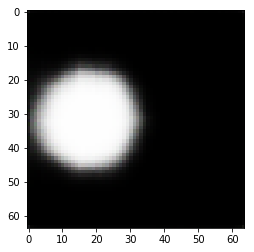

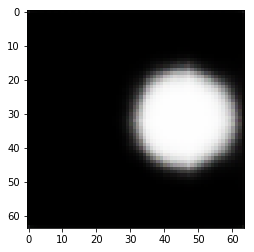

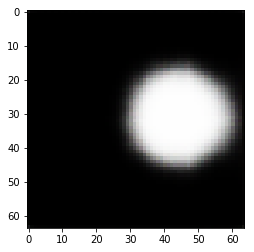

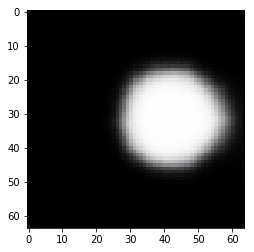

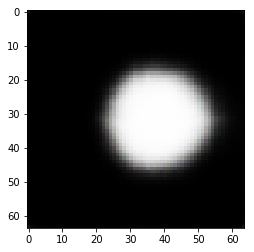

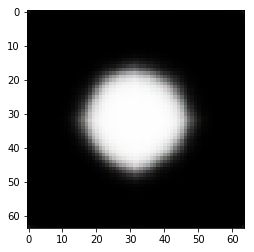

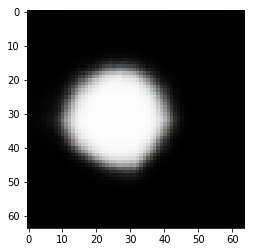

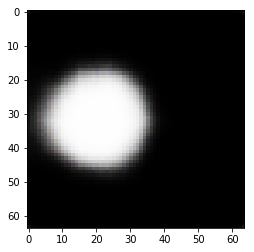

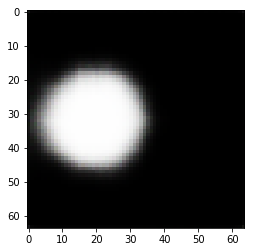

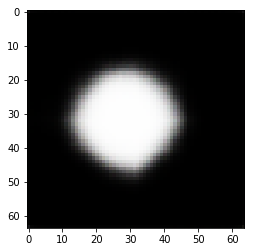

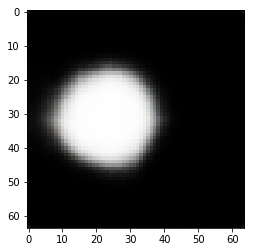

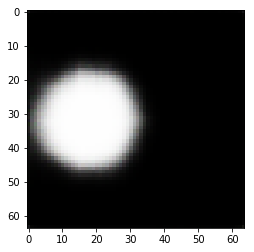

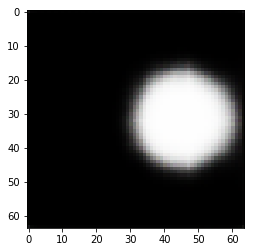

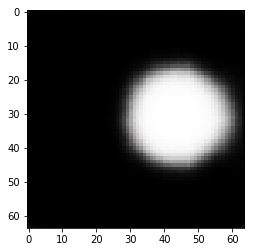

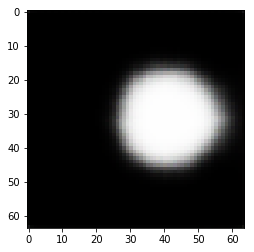

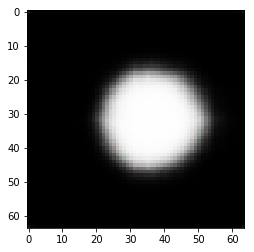

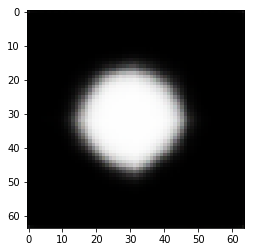

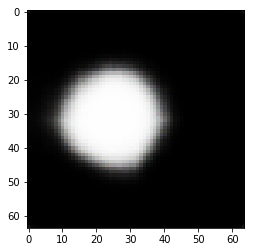

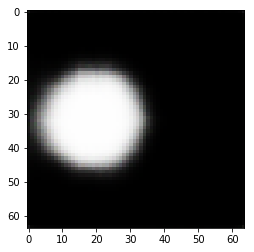

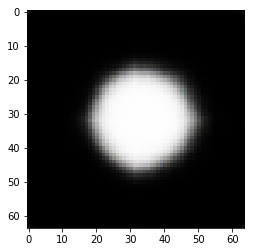

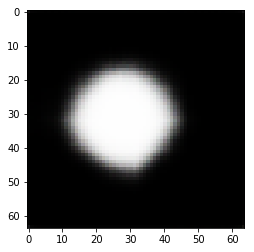

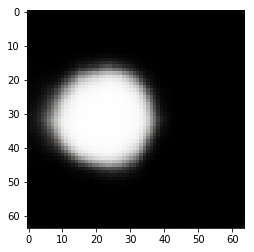

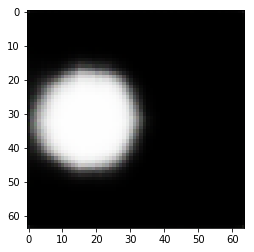

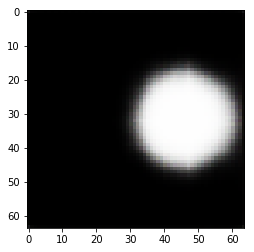

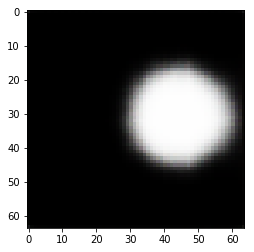

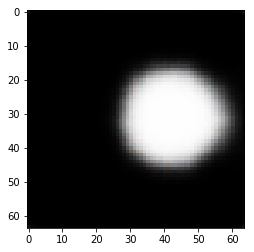

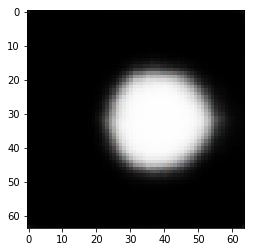

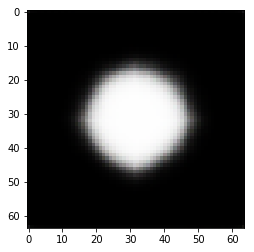

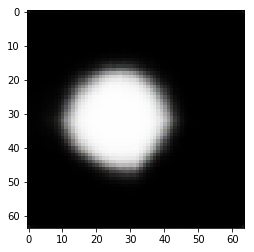

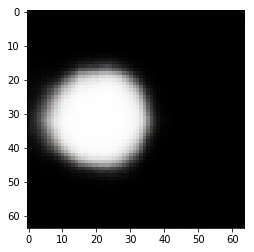

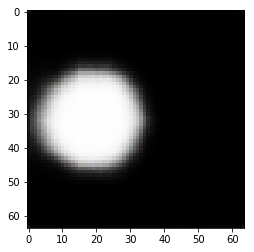

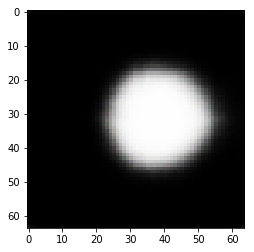

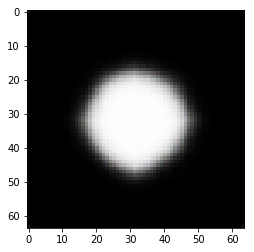

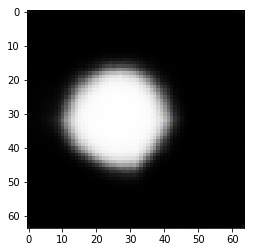

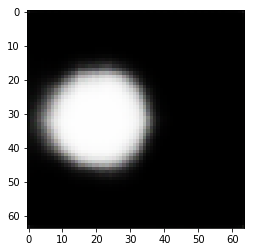

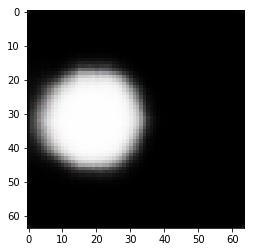

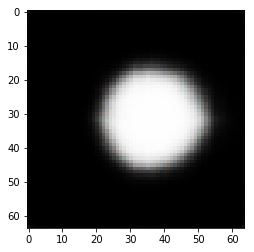

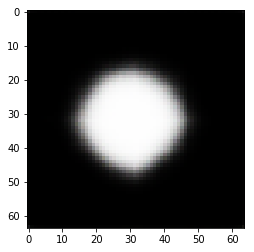

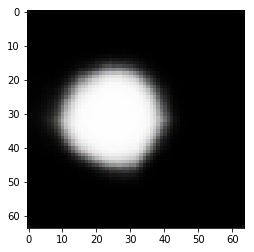

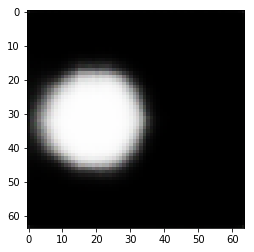

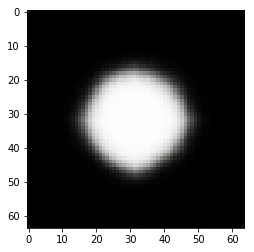

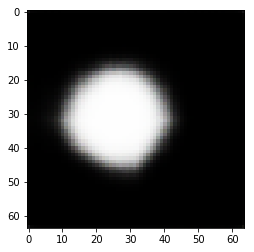

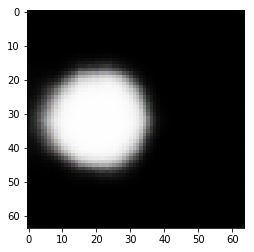

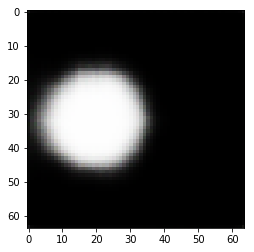

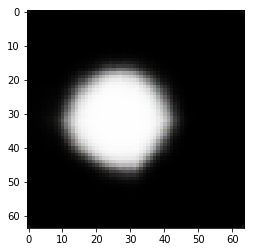

KeyboardInterrupt: 

In [8]:
z = torch.tensor([0.,0.])
im = vae.forward(z,decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
for i,action in enumerate(torch.Tensor(np.ones(500))):
    """print('BEFORE')
    plt.imshow(im.reshape(64,64,3))
    plt.show()
    """
    im = vae.forward(z,decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
    #print('AFTER')
    plt.imshow(im.reshape(64,64,3))
    plt.show()
    
    action = action.long()
    next_z = ff.forward(z.reshape(-1,2),action.reshape(-1,1))
    z = next_z
    


In [43]:
a = np.load('inputs.npy')

In [45]:
a[:10]

array([[-0.88130796,  1.2468439 ],
       [ 1.125864  ,  1.0755175 ],
       [ 1.0633106 , -0.9202934 ],
       [ 1.009887  , -0.08503686],
       [ 1.1413716 ,  0.73646724],
       [ 1.0598003 , -1.3184814 ],
       [-1.0001605 , -1.1174941 ],
       [-1.0206794 , -0.14083005],
       [ 1.005618  , -0.340887  ],
       [-1.0206794 , -0.14083005]], dtype=float32)

In [59]:
import pickle
with open('outfile', 'rb') as fp:
    a = pickle.load(fp)

In [60]:
a

[tensor([[0.9531865716, -1.4708544016],
         [-1.4980837107, -1.3968827724],
         [0.9531865716, -1.4708544016],
         [1.1258640289, 1.0755175352],
         [0.6704722643, 1.0343204737],
         [0.6507137418, 0.5004172325],
         [0.6317524910, 0.1917878985],
         [0.1091486216, 0.1459011734],
         [0.1677646488, 0.5581479669],
         [0.2629654706, 1.1350948811]], device='cuda:0'), tensor([[ 1],
         [ 3],
         [ 2],
         [ 3],
         [ 2],
         [ 2],
         [ 3],
         [ 0],
         [ 0],
         [ 2]], device='cuda:0'), tensor([[0.6480941176, -1.1960271597],
         [1.1447093487, -1.2938178778],
         [0.9938085675, 1.3251526356],
         [0.4822598398, 1.0348595381],
         [0.5059967637, 0.4822548330],
         [0.5044540763, 0.1005292758],
         [0.0105791204, 0.1919109076],
         [0.2156783044, 0.5948079824],
         [0.3124020398, 1.0687025785],
         [0.0849896148, 0.5579468608]], device='cuda:0'), tensor([[

BEFORE


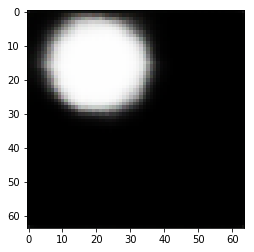

tensor([ 1], device='cuda:0')
BEFORE


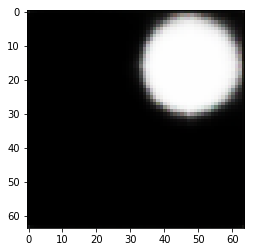

tensor([ 3], device='cuda:0')
BEFORE


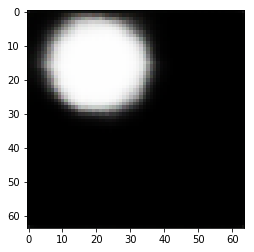

tensor([ 2], device='cuda:0')
BEFORE


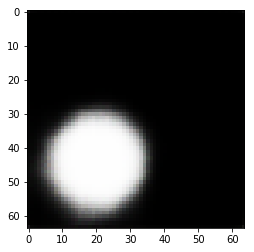

tensor([ 3], device='cuda:0')
BEFORE


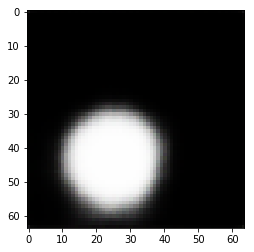

tensor([ 2], device='cuda:0')
BEFORE


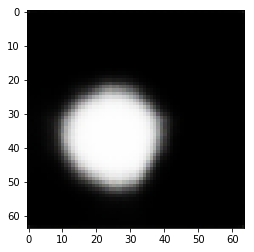

tensor([ 2], device='cuda:0')
BEFORE


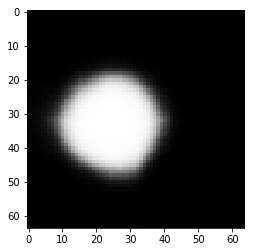

tensor([ 3], device='cuda:0')
BEFORE


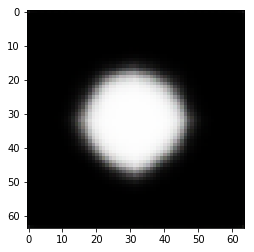

tensor([ 0], device='cuda:0')
BEFORE


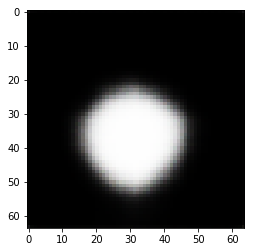

tensor([ 0], device='cuda:0')
BEFORE


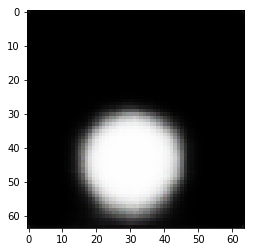

tensor([ 2], device='cuda:0')


In [91]:
im = vae.forward(a[0][0].cpu(),decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
for i,elem in enumerate(a[0]):
    im = vae.forward(elem.cpu(),decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
    
    print('BEFORE')
    plt.imshow(im.reshape(64,64,3))
    plt.show()
    
    print(a[1][i])
    


    
    
    '''
    action = action.long()
    next_z = ff.forward(z.reshape(-1,2),action.reshape(-1,1))
    z = next_z'''
    

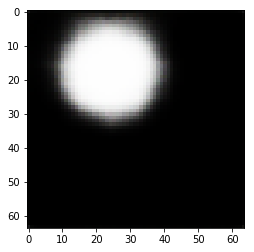

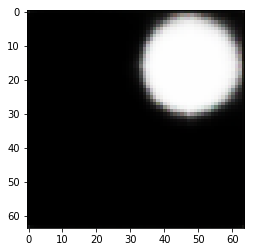

tensor([ 1], device='cuda:0')


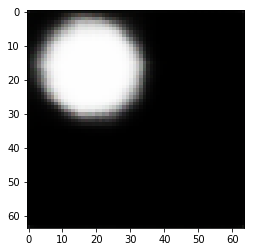

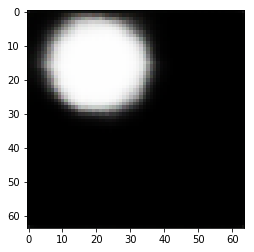

tensor([ 3], device='cuda:0')


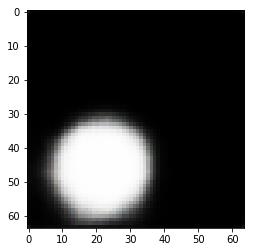

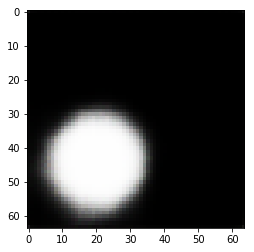

tensor([ 2], device='cuda:0')


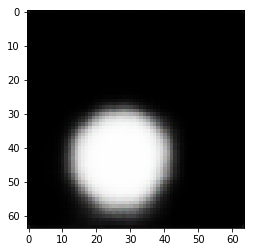

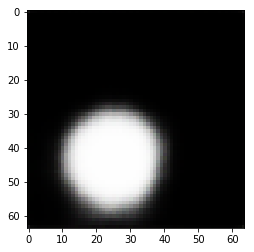

tensor([ 3], device='cuda:0')


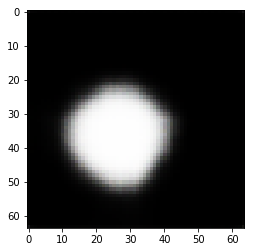

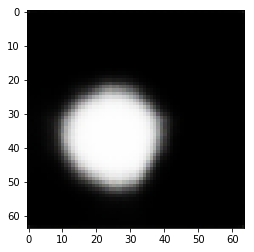

tensor([ 2], device='cuda:0')


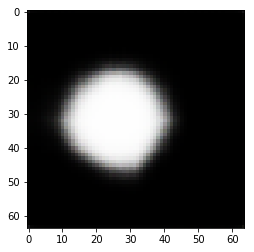

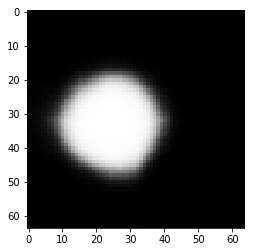

tensor([ 2], device='cuda:0')


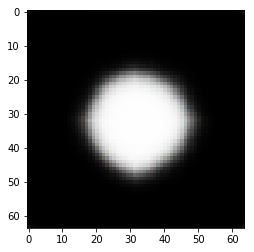

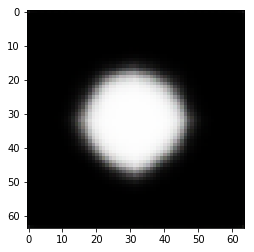

tensor([ 3], device='cuda:0')


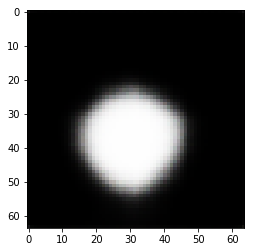

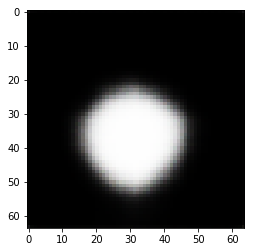

tensor([ 0], device='cuda:0')


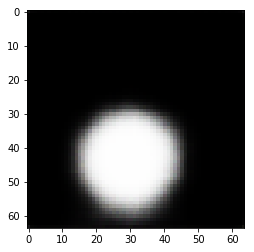

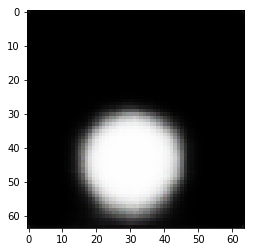

tensor([ 0], device='cuda:0')


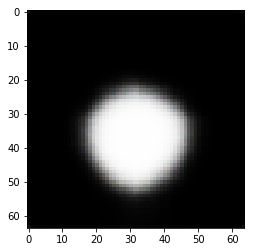

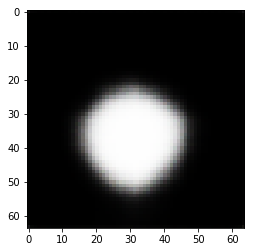

tensor([ 2], device='cuda:0')


In [85]:
im = vae.forward(a[2][0].cpu(),decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
for i,elem in enumerate(a[2]):
    im = vae.forward(elem.cpu(),decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
    plt.imshow(im.reshape(64,64,3))
    plt.show()

    
    im = vae.forward(a[3][i].cpu(),decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
    plt.imshow(im.reshape(64,64,3))
    plt.show()
    
    print(a[1][i])
    


    
    
    '''
    action = action.long()
    next_z = ff.forward(z.reshape(-1,2),action.reshape(-1,1))
    z = next_z'''
    

In [68]:
a[0][0].detach()

tensor([0.9531865716, -1.4708544016], device='cuda:0')

In [80]:
for i in range(len(a[0])):
    print((a[3][i]-a[2][i]))

tensor([-2.1461777687, -0.2008556128], device='cuda:0')
tensor([-0.1915227771, -0.1770365238], device='cuda:0')
tensor([0.1320554614, -0.2496351004], device='cuda:0')
tensor([0.1882124245, -0.0005390644], device='cuda:0')
tensor([0.1447169781, 0.0181623995], device='cuda:0')
tensor([0.1272984147, 0.0912586227], device='cuda:0')
tensor(1.00000e-02 *
       [9.8569497466, -4.6009734273], device='cuda:0')
tensor(1.00000e-02 *
       [-4.7913655639, -3.6660015583], device='cuda:0')
tensor(1.00000e-02 *
       [-4.9436569214, 6.6392302513], device='cuda:0')
tensor(1.00000e-02 *
       [8.2775034010, 0.0201106071], device='cuda:0')


In [81]:
print(a[1])

tensor([[ 1],
        [ 3],
        [ 2],
        [ 3],
        [ 2],
        [ 2],
        [ 3],
        [ 0],
        [ 0],
        [ 2]], device='cuda:0')


# Linear disentanglement (dim 4)

In [ ]:
from PIL import Image
import os
import numpy as np
import torch
%pylab inline
inputs = []
for i,elem in enumerate(os.listdir('images/')):
    im = np.asarray(Image.open('images/' + str(i+1)+'.png').convert('RGB'))
    inputs.append(im)
inputs = np.array(inputs).reshape(-1,64,64,3)
inputs = inputs.astype('float32') / 255.




from vae.arch_torch import VAE
vae = torch.load('vae/15483481760431166_disentangled/saved_models/epoch_10_env_0', map_location={'cuda:0': 'cpu'})

inputs_z = []
for i,elem in enumerate(inputs):
    #plt.imshow(elem)
    #plt.show()
    z = vae.forward(torch.Tensor(elem.reshape(-1,64,64,3).transpose((0,3,1,2))), encode=True, mean=True)
    inputs_z.append(z)
    print(z)

# Figures for paper

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_im = []
directory = 'forward/15505879811569538/validation/epoch_300/'

for ac in ['left/', 'right/', 'down/', 'up/']:
    aux = []
    for elem in range(30):
        img=mpimg.imread(directory+ac+str(elem)+'.png')
        aux.append(img)
    list_im.append(aux)

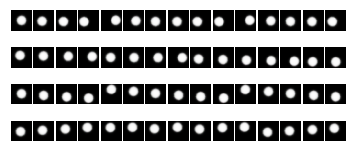

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_im = []
directory = 'forward/15505879811569538/validation/epoch_300/'

for ac in ['left/', 'right/', 'down/', 'up/']:
    aux = []
    for elem in range(30):
        img=mpimg.imread(directory+ac+str(elem)+'.png')
        aux.append(img)
    list_im.append(aux)


fig, ax = plt.subplots(nrows=4, ncols=15)
fig.subplots_adjust(left  = 0.125,right = 0.9,bottom = 0.25,top = 0.75,wspace = 0.1,hspace = 0.1)
for k,i in enumerate(ax):
    for j,axis in enumerate(i):
        axis.axis('off')
        axis.imshow(list_im[k][j])
        axis.set_xticklabels([])
        axis.set_yticklabels([])
        axis.set_aspect(1)
plt.show()

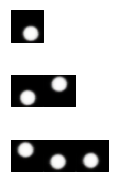

In [18]:
from matplotlib import gridspec


fig = plt.figure(figsize=(10, 4)) 

gs = gridspec.GridSpec(4, 15, width_ratios=15*[1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845)

for k,i in enumerate(range(4)):
    for j,axis in enumerate(range(i)):
        axis = plt.subplot(gs[k,j])
        axis.axis('off')
        axis.imshow(list_im[k][15+j])
        axis.set_xticklabels([])
        axis.set_yticklabels([])
        
        


In [7]:
import os
import torch
import numpy as np
%pylab inline

all_subdirs = ['vae/' + d for d in os.listdir('vae/') if os.path.isdir('vae/' + d)]

latest_subdir = max(all_subdirs, key=os.path.getmtime)

vae = torch.load(latest_subdir + '/saved_models/epoch_34_env_0', map_location={'cuda:0': 'cpu'})
    
    
z = torch.tensor([1.,1.,1.,1.])
im = vae.forward(z,action=None,decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
ims=[]
for ac in [-1,0,1,2]:
    aux=[]
    for i,action in enumerate(torch.Tensor(np.ones(15))+ac):
        im = vae.forward(z.cpu(),action=None, decode=True).detach().numpy().reshape(-1,3,64,64).transpose((0,2,3,1))
        im = im.reshape(64,64,3) 
        aux.append(im)
        action = action.long()
        next_z = vae.predict_next_z(z.reshape(-1,4),action.reshape(-1,1), cuda=False)
        z = next_z
    ims.append(aux)
    
fig, ax = plt.subplots(nrows=4, ncols=15)
fig.subplots_adjust(left  = 0.125,right = 0.9,bottom = 0.25,top = 0.75,wspace = 0.1,hspace = 0.1)
for k,i in enumerate(ax):
    for j,axis in enumerate(i):
        axis.axis('off')
        axis.imshow(ims[k][j])
        axis.set_xticklabels([])
        axis.set_yticklabels([])
        axis.set_aspect(1)
plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/looka/gym-gpu/lib/python3.5/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'vae.arch_torch_sans_cos_sin.VAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


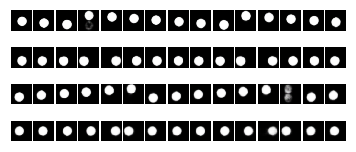

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=15)
fig.subplots_adjust(left  = 0.125,right = 0.9,bottom = 0.25,top = 0.75,wspace = 0.1,hspace = 0.1)
for k,i in enumerate(ax):
    for j,axis in enumerate(i):
        axis.axis('off')
        axis.imshow(ims[k][j])
        axis.set_xticklabels([])
        axis.set_yticklabels([])
        axis.set_aspect(1)
plt.show()

In [4]:
!pwd

/home/looka/workspace/phd/group/Symmetry_based_Disentanglement/learn_4_dim_linear_disentangled_representation
